In [1]:
%matplotlib inline

import matplotlib
import tensorflow as tf
import numpy as np
import helpers
from Seq2seqModel import Seq2SeqModel
import matplotlib.pyplot as plt

In [2]:
seq2seq = Seq2SeqModel()


In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_ = [[9,8,7]] *5
    
    batch_,batch_length_ = helpers.batch(batch_)
    print("batch_encode: \n" + str(batch_))
    
    din_, dlen_ = helpers.batch(np.ones(shape=(5,1), dtype=np.int32), max_sequence_length=4)
    
    print('decoder inputs: \n' + str(din_))
    print('decoder input size: \n' + str(batch_.shape[0]))
    out_length = np.asarray([din_.shape[0]]*din_.shape[1])
    print('decoder inpput full length: \n' + str(out_length))
    print('Predict results: \n' + str(seq2seq.predict(sess, batch_, din_,out_length)))
    
    
    

batch_encode: 
[[9 9 9 9 9]
 [8 8 8 8 8]
 [7 7 7 7 7]]
decoder inputs: 
[[1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
decoder input size: 
3
decoder inpput full length: 
[4 4 4 4 4]
Predict results: 
[array([[0, 0, 0, 0, 0],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9]])]


In [4]:
batch_size = 100

batches = helpers.random_sequences(length_from=3, length_to=12, vocab_lower=2, vocab_upper=10, batch_size=batch_size)
print('head of the batch')
for seq in next(batches)[:10]:
    print(seq)


head of the batch
[3, 9, 3, 3, 2, 2, 7, 3]
[3, 8, 3, 2, 4, 7, 3, 8, 4, 2, 8, 4]
[8, 9, 9, 2, 2, 6, 7, 7, 6, 8, 7, 7]
[3, 9, 5, 8, 4, 3, 6]
[6, 3, 4, 4, 4, 2, 4, 3, 2, 4, 2]
[4, 4, 8, 9, 3, 3, 2, 9, 7, 8, 4, 4]
[4, 8, 4, 6, 2, 6, 8, 9]
[9, 8, 5, 2, 2, 9, 9, 6, 7, 4]
[8, 4, 6, 2, 9, 2, 2, 5, 6, 7, 9]
[5, 7, 4, 8, 6, 3, 3, 9]


In [5]:
EOS = 1

def next_feed():
    batch = next(batches)
    encoder_inputs_, _ = helpers.batch(batch)
    decoder_targets_, _ = helpers.batch(
            [(sequence)+[EOS] for sequence in batch]
        )
    
    decoder_inputs_, _ = helpers.batch(
            [[EOS] + (sequence) for sequence in batch]
        )
    
    decoder_full_length = np.asarray([decoder_inputs_.shape[0]] * decoder_inputs_.shape[1])
    
    return encoder_inputs_, decoder_inputs_,decoder_targets_, decoder_full_length

In [6]:
loss_track = []

max_batches = 3001
batches_in_epoch = 1000



In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for batch in range(max_batches):
        encoder_inputs, decoder_inputs, decoder_targets, decoder_full_length = next_feed()
        
        train_op, loss, summary_op = seq2seq.update(sess, encoder_inputs, decoder_inputs, 
                                                    decoder_targets, decoder_full_length)
        loss_track.append(loss)
        
        if batch == 0 or batch % batches_in_epoch == 0:
            print('batch {}'.format(batch))
            print('     minibatch loss: {}'.format(loss))
            predict_ = seq2seq.predict(sess, encoder_inputs, decoder_inputs, decoder_full_length)
        
            for i, (inp, pred) in enumerate(zip(np.array(encoder_inputs).T, np.array(predict_).T)):
                print('     sample {}:'.format(i +1))
                print('         input    > {}'.format(inp))
                print('         predicted> {}'.format(np.array(pred).T[0]))
                if i >= 2:
                    break;
            print()


batch 0
     minibatch loss: 2.54400897026062
     sample 1:
         input    > [7 8 7 8 3 4 6 5 9 9 0 0]
         predicted> [3 3 0 3 0 3 7 3 3 3 3 4 0]
     sample 2:
         input    > [8 5 4 5 0 0 0 0 0 0 0 0]
         predicted> [5 0 0 0 8 0 0 0 0 0 0 0 0]
     sample 3:
         input    > [6 2 8 7 9 0 0 0 0 0 0 0]
         predicted> [5 3 0 0 0 0 0 0 0 0 0 0 0]

batch 1000
     minibatch loss: 0.0724739357829094
     sample 1:
         input    > [4 3 5 4 7 8 7 8 0 0 0 0]
         predicted> [4 3 5 4 7 8 7 8 1 0 0 0 0]
     sample 2:
         input    > [4 8 7 3 8 3 5 0 0 0 0 0]
         predicted> [4 8 7 3 8 3 5 1 0 0 0 0 0]
     sample 3:
         input    > [7 3 5 9 9 0 0 0 0 0 0 0]
         predicted> [7 3 5 9 9 1 0 0 0 0 0 0 0]

batch 2000
     minibatch loss: 0.043062686920166016
     sample 1:
         input    > [9 3 5 2 9 4 6 6 0 0 0 0]
         predicted> [9 3 5 2 9 4 6 6 1 0 0 0 0]
     sample 2:
         input    > [5 7 6 9 8 6 0 0 0 0 0 0]
         predicted> [5 7

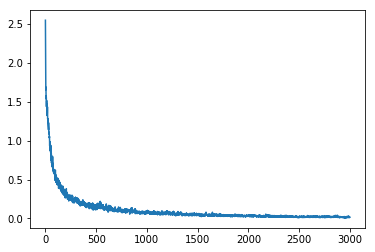

In [8]:
plt.plot(loss_track)